# Trabalhando com tempo em um dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [2]:
date = np.array('2023-05-01', dtype=np.datetime64)
date

array('2023-05-01', dtype='datetime64[D]')

In [3]:
date + np.arange(12)

array(['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
       '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
       '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12'],
      dtype='datetime64[D]')

In [4]:
date = pd.to_datetime('2023-05-01')
date

Timestamp('2023-05-01 00:00:00')

In [5]:
date = pd.to_datetime('1st of may, 2023')
date

Timestamp('2023-05-01 00:00:00')

In [6]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
               '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12'],
              dtype='datetime64[ns]', freq=None)

In [7]:
index = pd.DatetimeIndex(['2022-01-05', '2022-06-05', '2023-01-05', '2023-06-05'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2022-01-05    0
2022-06-05    1
2023-01-05    2
2023-06-05    3
dtype: int64

In [8]:
data['2023']

2023-01-05    2
2023-06-05    3
dtype: int64

In [9]:
dates = pd.to_datetime([datetime(2022, 7, 3), '7th of September, 2022',
'2021-Jul-6', '07-07-2022', '20150708'])
dates

DatetimeIndex(['2022-07-03', '2022-09-07', '2021-07-06', '2022-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [10]:
dates.to_period('D')

PeriodIndex(['2022-07-03', '2022-09-07', '2021-07-06', '2022-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [11]:
dates - dates[0]

TimedeltaIndex(['0 days', '66 days', '-362 days', '4 days', '-2552 days'], dtype='timedelta64[ns]', freq=None)

In [12]:
pd.date_range('2023-01-01', '2023-01-07')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07'],
              dtype='datetime64[ns]', freq='D')

In [13]:
pd.date_range('2023-01-01', periods=8)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.date_range('2023-01-01', periods=8, freq='H')

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
pd.period_range('2023-01', periods=8, freq='M')

PeriodIndex(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08'],
            dtype='period[M]')

In [16]:
pd.timedelta_range(0, periods=23, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00',
                '0 days 12:00:00', '0 days 13:00:00', '0 days 14:00:00',
                '0 days 15:00:00', '0 days 16:00:00', '0 days 17:00:00',
                '0 days 18:00:00', '0 days 19:00:00', '0 days 20:00:00',
                '0 days 21:00:00', '0 days 22:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Resampling

Frequência Pandas 

|Código|Descrição|
|-----|-------|
|D|Dia do calendario|
|W|Semanal|
|M|Fim do mês|
|Q|Fim do quarter|
|A|Fim do ano|
|H|Horas|
|T|Minutos|
|S|Segundos|
|B|Dia comercial|
|BM|Fim do mês comercial|
|BQ|Fim do quarter comercial|
|BA|Fim do ano comercial|

In [17]:
pd.timedelta_range(0, periods=9, freq="2H30T") #2 horas e 30 minutos

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [20]:
df = pd.read_csv('all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [21]:
df['date'] = pd.to_datetime(df.date)
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [22]:
df = df[df.Name=='AAL']
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL


In [23]:
df.set_index('date', inplace=True)
df = df['close']
df

date
2013-02-08    14.75
2013-02-11    14.46
2013-02-12    14.27
2013-02-13    14.66
2013-02-14    13.99
              ...  
2018-02-01    53.88
2018-02-02    52.10
2018-02-05    49.76
2018-02-06    51.18
2018-02-07    51.40
Name: close, Length: 1259, dtype: float64

<Axes: xlabel='date'>

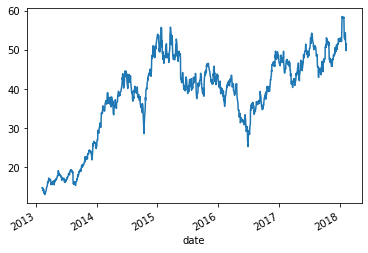

In [24]:
df.plot()

In [25]:
df

date
2013-02-08    14.75
2013-02-11    14.46
2013-02-12    14.27
2013-02-13    14.66
2013-02-14    13.99
              ...  
2018-02-01    53.88
2018-02-02    52.10
2018-02-05    49.76
2018-02-06    51.18
2018-02-07    51.40
Name: close, Length: 1259, dtype: float64

In [26]:
df.resample('BA').mean()

date
2013-12-31    18.601549
2014-12-31    38.923550
2015-12-31    45.121607
2016-12-30    38.183829
2017-12-29    47.490717
2018-12-31    54.280000
Freq: BA-DEC, Name: close, dtype: float64

In [27]:
df.resample('BA').mean() ##agregação

date
2013-12-31    18.601549
2014-12-31    38.923550
2015-12-31    45.121607
2016-12-30    38.183829
2017-12-29    47.490717
2018-12-31    54.280000
Freq: BA-DEC, Name: close, dtype: float64

In [28]:
df.asfreq('BA') ##seleção

date
2013-12-31    25.25
2014-12-31    53.63
2015-12-31    42.35
2016-12-30    46.69
2017-12-29    52.03
Freq: BA-DEC, Name: close, dtype: float64

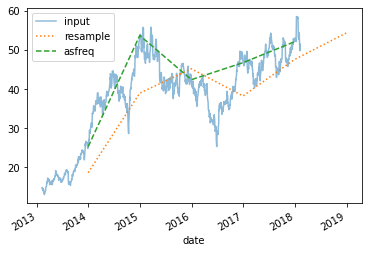

In [29]:
df.plot(alpha=0.5, style='-')
df.resample('BA').mean().plot(style=':')
df.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
loc='upper left');

## Time shift

In [30]:
df

date
2013-02-08    14.75
2013-02-11    14.46
2013-02-12    14.27
2013-02-13    14.66
2013-02-14    13.99
              ...  
2018-02-01    53.88
2018-02-02    52.10
2018-02-05    49.76
2018-02-06    51.18
2018-02-07    51.40
Name: close, Length: 1259, dtype: float64

In [31]:
df.asfreq("D")

date
2013-02-08    14.75
2013-02-09      NaN
2013-02-10      NaN
2013-02-11    14.46
2013-02-12    14.27
              ...  
2018-02-03      NaN
2018-02-04      NaN
2018-02-05    49.76
2018-02-06    51.18
2018-02-07    51.40
Freq: D, Name: close, Length: 1826, dtype: float64

In [32]:
df = df.asfreq("D", method='ffill')

In [33]:
df

date
2013-02-08    14.75
2013-02-09    14.75
2013-02-10    14.75
2013-02-11    14.46
2013-02-12    14.27
              ...  
2018-02-03    52.10
2018-02-04    52.10
2018-02-05    49.76
2018-02-06    51.18
2018-02-07    51.40
Freq: D, Name: close, Length: 1826, dtype: float64

In [34]:
df_shift = df.shift(900) ##passando 900 dias
df_shift

date
2013-02-08      NaN
2013-02-09      NaN
2013-02-10      NaN
2013-02-11      NaN
2013-02-12      NaN
              ...  
2018-02-03    43.63
2018-02-04    43.53
2018-02-05    41.98
2018-02-06    39.75
2018-02-07    39.75
Freq: D, Name: close, Length: 1826, dtype: float64

In [35]:
df.index[0] + timedelta(900)

Timestamp('2015-07-28 00:00:00')

In [36]:
df_shift[:900]

date
2013-02-08   NaN
2013-02-09   NaN
2013-02-10   NaN
2013-02-11   NaN
2013-02-12   NaN
              ..
2015-07-23   NaN
2015-07-24   NaN
2015-07-25   NaN
2015-07-26   NaN
2015-07-27   NaN
Freq: D, Name: close, Length: 900, dtype: float64

In [37]:
df_shift[df.index[0] + timedelta(900)]

14.75

In [38]:
df.shift(900,freq='D') 

date
2015-07-28    14.75
2015-07-29    14.75
2015-07-30    14.75
2015-07-31    14.46
2015-08-01    14.27
              ...  
2020-07-22    52.10
2020-07-23    52.10
2020-07-24    49.76
2020-07-25    51.18
2020-07-26    51.40
Freq: D, Name: close, Length: 1826, dtype: float64

## Rolling windows

In [39]:
df

date
2013-02-08    14.75
2013-02-09    14.75
2013-02-10    14.75
2013-02-11    14.46
2013-02-12    14.27
              ...  
2018-02-03    52.10
2018-02-04    52.10
2018-02-05    49.76
2018-02-06    51.18
2018-02-07    51.40
Freq: D, Name: close, Length: 1826, dtype: float64

In [40]:
df.rolling(3, center=True).mean()

date
2013-02-08          NaN
2013-02-09    14.750000
2013-02-10    14.653333
2013-02-11    14.493333
2013-02-12    14.463333
                ...    
2018-02-03    52.100000
2018-02-04    51.320000
2018-02-05    51.013333
2018-02-06    50.780000
2018-02-07          NaN
Freq: D, Name: close, Length: 1826, dtype: float64

In [41]:
df.rolling(3, center=False).mean()

date
2013-02-08          NaN
2013-02-09          NaN
2013-02-10    14.750000
2013-02-11    14.653333
2013-02-12    14.493333
                ...    
2018-02-03    52.693333
2018-02-04    52.100000
2018-02-05    51.320000
2018-02-06    51.013333
2018-02-07    50.780000
Freq: D, Name: close, Length: 1826, dtype: float64

In [42]:
df.rolling(3, closed='left').mean() #ultima posição é excluida 

date
2013-02-08          NaN
2013-02-09          NaN
2013-02-10          NaN
2013-02-11    14.750000
2013-02-12    14.653333
                ...    
2018-02-03    53.433333
2018-02-04    52.693333
2018-02-05    52.100000
2018-02-06    51.320000
2018-02-07    51.013333
Freq: D, Name: close, Length: 1826, dtype: float64

In [43]:
df.rolling(3, closed='right').mean() #primeira posição é excluida 

date
2013-02-08          NaN
2013-02-09          NaN
2013-02-10    14.750000
2013-02-11    14.653333
2013-02-12    14.493333
                ...    
2018-02-03    52.693333
2018-02-04    52.100000
2018-02-05    51.320000
2018-02-06    51.013333
2018-02-07    50.780000
Freq: D, Name: close, Length: 1826, dtype: float64